In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [5]:
import os

def print_tree(root_dir):
    for root, dirs, files in os.walk(root_dir):
        level = root.replace(root_dir, "").count(os.sep)
        indent = " " * 4 * level
        print(f"{indent}📁 {os.path.basename(root)}/")

        subindent = " " * 4 * (level + 1)
        for f in files:
            print(f"{subindent}📄 {f}")

# Ví dụ
print_tree(r"C:\Users\Phong\Desktop\GIS\Project 2\New folder")


📁 New folder/
    📄 1_Second_DEM_Smoothed.tif
    📄 readme_metadata.html
    📁 Ancillary/
        📄 1secSRTM_Derived_DEMs_UserGuide_v1.0.4.pdf
        📄 availability.txt
        📄 copyright.txt
        📄 DEMS_TileIndex.dbf
        📄 DEMS_TileIndex.prj
        📄 DEMS_TileIndex.shp
        📄 DEMS_TileIndex.shx
        📄 NEDF_CClicence_template.rtf
        📄 publication.txt
        📄 quality.txt
        📄 readme.txt


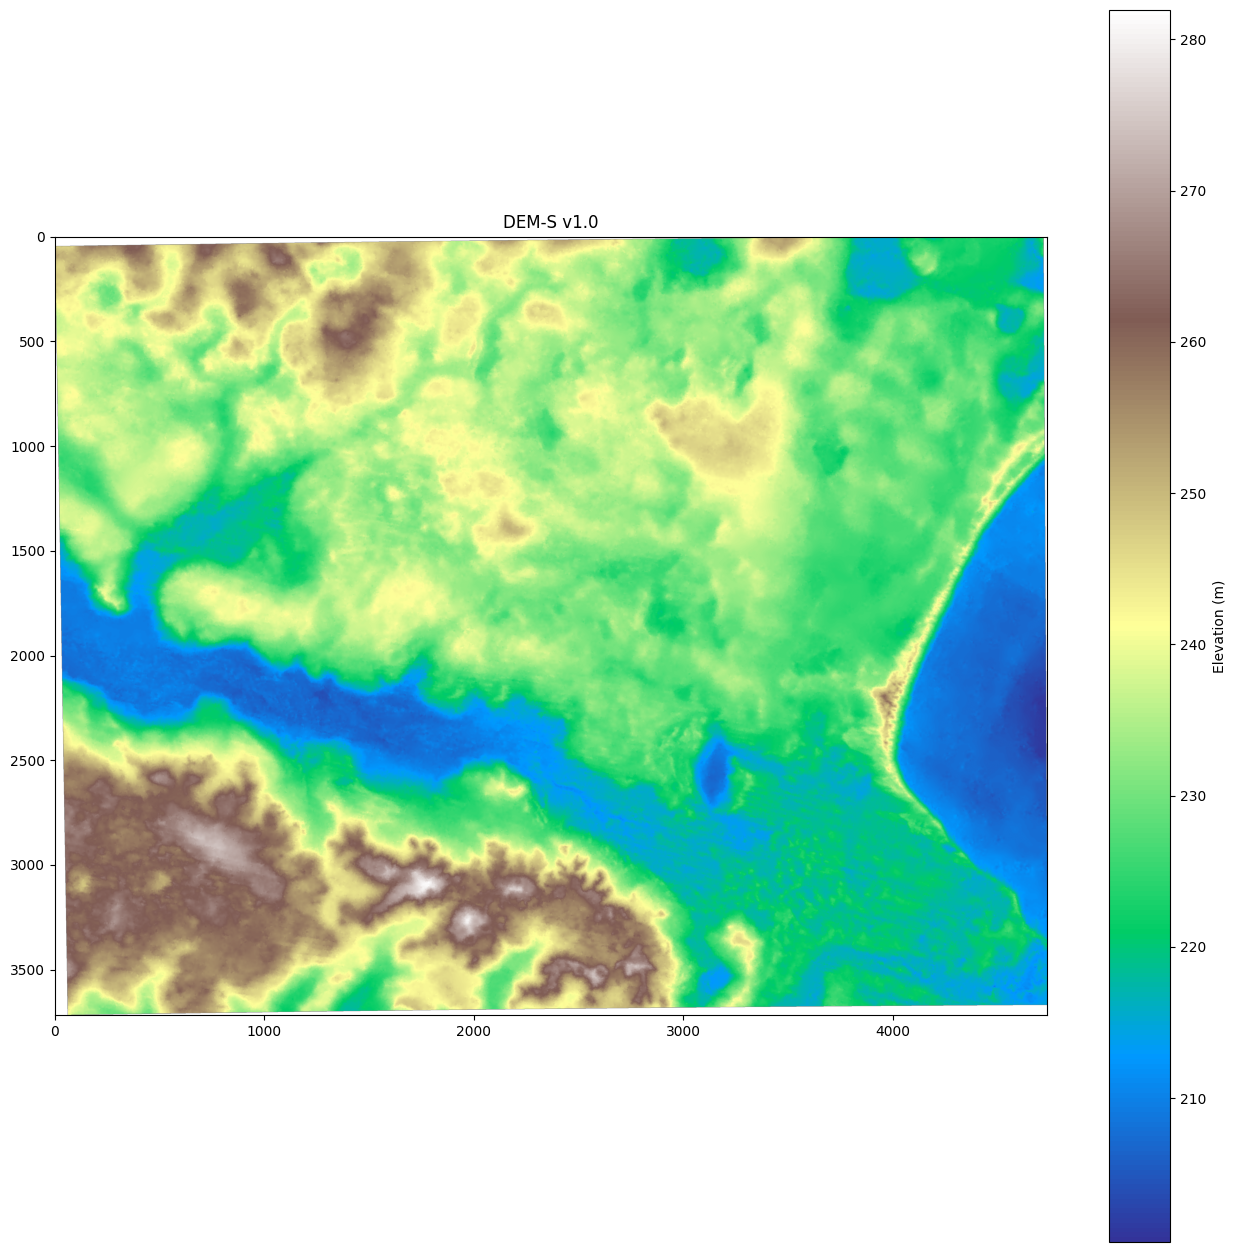

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open(r"C:\Users\Phong\Desktop\GIS\Project 2\New folder\1_Second_DEM_Smoothed.tif") as src:
    dem = src.read(1)
    nodata = src.nodata

dem = np.ma.masked_equal(dem, nodata)

plt.figure(figsize=(16,16))
plt.imshow(dem, cmap="terrain")
plt.colorbar(label="Elevation (m)")
plt.title("DEM-S v1.0")
plt.show()


In [25]:
import rioxarray as rxr

dem = rxr.open_rasterio(
   r"C:\Users\Phong\Desktop\GIS\Project 2\New folder\1_Second_DEM_Smoothed.tif",
    masked=True
)

dem

<xarray.DataArray (band: 1, y: 3719, x: 4737)> Size: 70MB
[17616903 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 38kB -2.134e+05 -2.134e+05 ... -7.374e+04
  * y            (y) float64 30kB -1.987e+06 -1.987e+06 ... -2.101e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [ ]:


# with rasterio.open(r"C:\Users\Phong\Desktop\GIS\Project 2\1 second SRTM Level 2 Derived Digital Elevation Model v1.0\srtm-1sec-dem-v1-COG.tif") as src:
#     dem = src.read(1)
#     nodata = src.nodata

# dem = np.ma.masked_equal(dem, nodata)

# plt.figure(figsize=(16,16))
# plt.imshow(dem, cmap="terrain")
# plt.colorbar(label="Elevation (m)")
# plt.title("DEM-S v1.0")
# plt.show()


In [6]:
import geopandas as gpd

tile_index_path = r"C:\Users\Phong\Desktop\GIS\Project 2\New folder\Ancillary\DEMS_TileIndex.shp"

gdf = gpd.read_file(tile_index_path)

gdf.head()

,NAME,PATH,FORMAT,COMP,PYRAMID,BANDS,PIXEL_TYPE,SP_REF,UNIT,SIZE_X,SIZE_Y,COLS,ROWS,X_MIN,X_MAX,Y_MIN,Y_MAX,geometry
0,e113s22dems,\\nas\GA\CDS\internal\physiography\topographic_relief\elevation\data\nationaldatasets\1seconddem\1secSRTM_DEM_DEMS_v1.0\e113s22de,GRID,Default,False,1,Single precision floating point,GCS_WGS_1984,Degree,0.000278,0.000278,3600,3600,112.999861,113.999861,-22.000139,-21.000139,"POLYGON ((112.99986 -22.00014, 112.99986 -21.00014, 113.99986 -21.00014, 113.99986 -22.00014, 112.99986 -22.00014))"
1,e113s23dems,\\nas\GA\CDS\internal\physiography\topographic_relief\elevation\data\nationaldatasets\1seconddem\1secSRTM_DEM_DEMS_v1.0\e113s23de,GRID,Default,False,1,Single precision floating point,GCS_WGS_1984,Degree,0.000278,0.000278,3600,3600,112.999861,113.999861,-23.000139,-22.000139,"POLYGON ((112.99986 -23.00014, 112.99986 -22.00014, 113.99986 -22.00014, 113.99986 -23.00014, 112.99986 -23.00014))"
2,e113s24dems,\\nas\GA\CDS\internal\physiography\topographic_relief\elevation\data\nationaldatasets\1seconddem\1secSRTM_DEM_DEMS_v1.0\e113s24de,GRID,Default,False,1,Single precision floating point,GCS_WGS_1984,Degree,0.000278,0.000278,3600,3600,112.999861,113.999861,-24.000139,-23.000139,"POLYGON ((112.99986 -24.00014, 112.99986 -23.00014, 113.99986 -23.00014, 113.99986 -24.00014, 112.99986 -24.00014))"
3,e113s25dems,\\nas\GA\CDS\internal\physiography\topographic_relief\elevation\data\nationaldatasets\1seconddem\1secSRTM_DEM_DEMS_v1.0\e113s25de,GRID,Default,False,1,Single precision floating point,GCS_WGS_1984,Degree,0.000278,0.000278,3600,3600,112.999861,113.999861,-25.000139,-24.000139,"POLYGON ((112.99986 -25.00014, 112.99986 -24.00014, 113.99986 -24.00014, 113.99986 -25.00014, 112.99986 -25.00014))"
4,e113s26dems,\\nas\GA\CDS\internal\physiography\topographic_relief\elevation\data\nationaldatasets\1seconddem\1secSRTM_DEM_DEMS_v1.0\e113s26de,GRID,Default,False,1,Single precision floating point,GCS_WGS_1984,Degree,0.000278,0.000278,3600,3600,112.999861,113.999861,-26.000139,-25.000139,"POLYGON ((112.99986 -26.00014, 112.99986 -25.00014, 113.99986 -25.00014, 113.99986 -26.00014, 112.99986 -26.00014))"


In [8]:
gdf.head(1)

,NAME,PATH,FORMAT,COMP,PYRAMID,BANDS,PIXEL_TYPE,SP_REF,UNIT,SIZE_X,SIZE_Y,COLS,ROWS,X_MIN,X_MAX,Y_MIN,Y_MAX,geometry
0,e113s22dems,\\nas\GA\CDS\internal\physiography\topographic_relief\elevation\data\nationaldatasets\1seconddem\1secSRTM_DEM_DEMS_v1.0\e113s22de,GRID,Default,False,1,Single precision floating point,GCS_WGS_1984,Degree,0.000278,0.000278,3600,3600,112.999861,113.999861,-22.000139,-21.000139,"POLYGON ((112.99986 -22.00014, 112.99986 -21.00014, 113.99986 -21.00014, 113.99986 -22.00014, 112.99986 -22.00014))"


In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        813 non-null    object  
 1   PATH        813 non-null    object  
 2   FORMAT      813 non-null    object  
 3   COMP        813 non-null    object  
 4   PYRAMID     813 non-null    object  
 5   BANDS       813 non-null    int32   
 6   PIXEL_TYPE  813 non-null    object  
 7   SP_REF      813 non-null    object  
 8   UNIT        813 non-null    object  
 9   SIZE_X      813 non-null    float64 
 10  SIZE_Y      813 non-null    float64 
 11  COLS        813 non-null    int32   
 12  ROWS        813 non-null    int32   
 13  X_MIN       813 non-null    float64 
 14  X_MAX       813 non-null    float64 
 15  Y_MIN       813 non-null    float64 
 16  Y_MAX       813 non-null    float64 
 17  geometry    813 non-null    geometry
dtypes: float64(6), geometry(1), int32(3), obje

Text(0.5, 1.0, 'DEM Tile Grid (1° x 1°)')

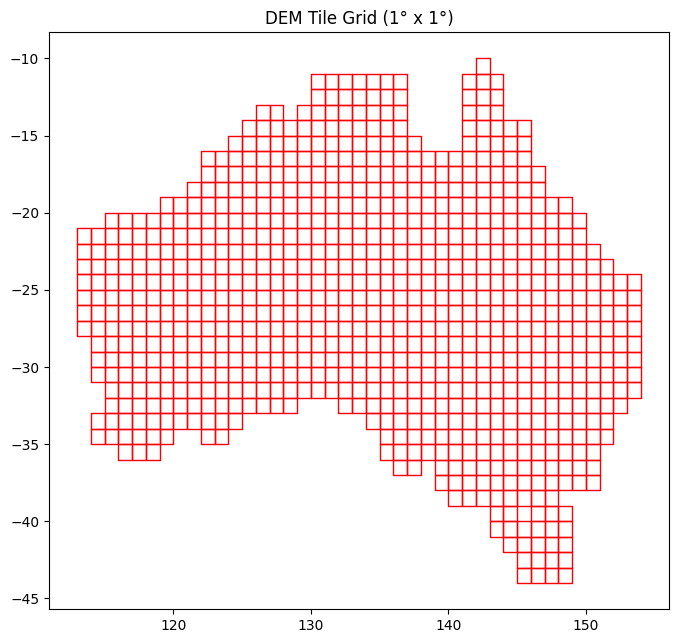

In [12]:
ax = gdf.plot(
    figsize=(8, 8),
    facecolor="none",
    edgecolor="red",
    linewidth=1
)

ax.set_title("DEM Tile Grid (1° x 1°)")

In [20]:
tile_index_path = r"C:\Users\Phong\Desktop\GIS\Project 2\nov25_adminbounds_gda_94_shp\NOV25_AdminBounds_GDA_94_SHP\StateBoundaries_AUG20_ALLSTATES_GDA94_SHP_100\State Boundaries\State Boundaries AUGUST 2020\Standard\NT_STATE_POLYGON_shp.shp"

gdf = gpd.read_file(tile_index_path)



Text(0.5, 1.0, 'DEM Tile Grid (1° x 1°)')

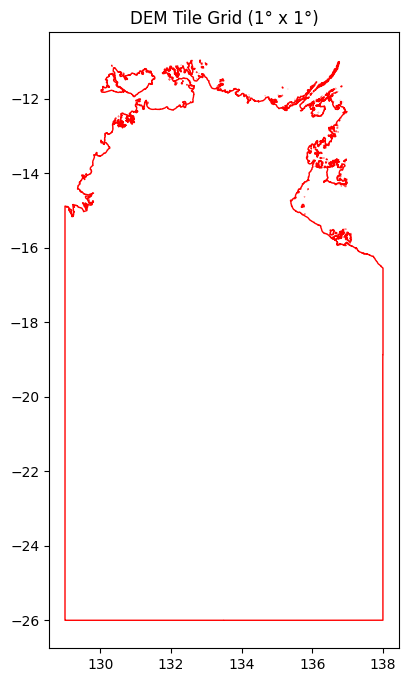

In [21]:
ax = gdf.plot(
    figsize=(8, 8),
    facecolor="none",
    edgecolor="red",
    linewidth=1
)

ax.set_title("DEM Tile Grid (1° x 1°)")

In [31]:
# Kiểm tra DEM .tif đang là Geographic hay Projected CRS

import rasterio

dem_path = r"C:\Users\Phong\Desktop\GIS\Project 2\1 second SRTM Level 2 Derived Digital Elevation Model v1.0\NT_SRTM_1sec.tif"

with rasterio.open(dem_path) as src:
    crs = src.crs
    print("CRS:", crs)
    print("Is geographic:", crs.is_geographic)
    print("Is projected:", crs.is_projected)

CRS: EPSG:4326
Is geographic: True
Is projected: False
